# Morton Denn Models vs Susi Models for Particle Interactions

## Electrostatic Repulsion Model

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Defining particle properties
a_i = 8e-6
a_j = 8e-6
a = 8e-6
k_inv = 0.05*a
k = 1.0/(k_inv)
F_er = 0.2e-9

c:\users\vishnu\appdata\local\enthought\canopy\user\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


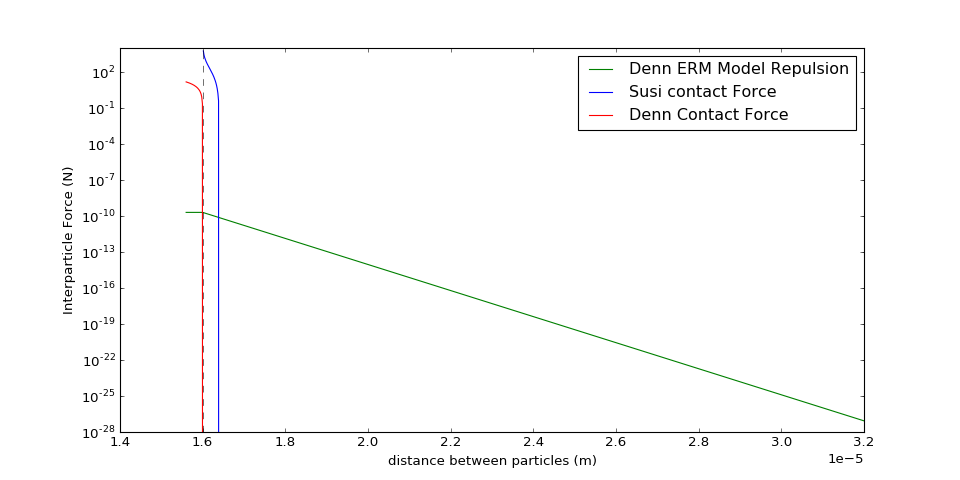

In [15]:
r_ij_morton = np.linspace(a_i + a_j - 0.05*a, 4*a,1000)
r_ij_susi = np.linspace(a_i+a_j, 4*a,1000)
        
#Morton Denn Model For Repulsion
def F_rep_morton(r_ij):
    if r_ij-a_i-a_j >= 0:
        return 2*F_er*a_i*a_j/(a*(a_i+a_j))*np.exp(-k*(r_ij-a_i-a_j)) 
    else:
        return 2*F_er*a_i*a_j/(a*(a_i+a_j))
def F_contact_morton(rij,k):
    if rij-a_i-a_j < 0: 
        hij = 2*(rij-a_i-a_j)/(a_i+a_j)
        return np.abs(hij)*k
    else:
        return 0
    
#Susi Model for repulsion

def F_rep_susi(rij):
    c_0 = .0001
    d_cutoff = .05*a
    c_rep= c_0/d_cutoff**2
    if rij-a_i-a_j <= d_cutoff:
        return c_rep*(rij-a_i-a_j - d_cutoff)**2/(rij-a_i-a_j)
    else:
        return 0

#interaction is repulsive, assosiated with a negative sign, not included here
F_r_morton = [F_rep_morton(r) for r in r_ij_morton ]  
F_r_susi = [F_rep_susi(r) for r in r_ij_susi ]


#or i in range(len(r_ij_morton)):
#   plt.plot(r_ij_morton[i],F_r_morton[i],mark[i])
plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel("distance between particles (m)")
plt.ylabel("Interparticle Force (N)")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.yscale('log')

#plt.ylim([0, 1.5*2*F_er*a_i*a_j/(a*(a_i+a_j))])
plt.plot(r_ij_morton,F_r_morton, 'g-',label="Denn ERM Model Repulsion")
plt.plot(r_ij_susi,F_r_susi, 'b',label='Susi contact Force')
plt.plot(r_ij_morton, [F_contact_morton(r,300) for r in r_ij_morton], 'r',label='Denn Contact Force')
plt.axvline(x=a_i+a_j,  color='k', linestyle='dashed', linewidth=0.5)

plt.legend(loc='upper right')
